<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# Data Camp RAMP Challenge on the avalanche risk prediction

<i> Florent Blanc, Bryan Chen, Sibylle Degos, Alice Devilder, Rémy Grabet, Théo Paquier </i>

## Introduction

Describe the challenge, in particular:

- Where the data comes from?
- What is the task this challenge aims to solve?
- Why does it matter?

### Avalanche risk

Avalanches pose a significant threat to outdoor enthusiasts, ski patrol teams, and mountain communities. Predicting avalanche risk accurately is crucial for ensuring safety in mountainous regions. This challenge aims to leverage data science to analyze and forecast avalanche risk based on historical reports from Météo-France. By processing and interpreting structured data extracted from avalanche risk bulletins, we can improve preparedness and decision-making in avalanche-prone areas.  

### The BERA database, a catalog of avalanche risk bulletins

The data for this challenge comes from **Météo-France** through the **Bulletins d'Estimation du Risque d'Avalanche (BERA)**, which provide official assessments of avalanche hazards. Originally, these reports were only available in PDF format, making them difficult to analyze systematically. However, [multi-coop](https://gitlab.com/multi-coop/meteofrance_bra_hist) has extracted and structured this data into CSV files, categorized by mountain region (massif) and publication date.

The dataset consists of **34,286 records**, each representing a daily avalanche risk bulletin for a specific massif. It includes **47 features**, covering information on:
- **Avalanche risk levels (`risque1`, `risque2`, `risque_maxi`)** at different altitudes.
- **Geographic and temporal data (`massif`, `altitude`, `date`)**.
- **Weather conditions (`isotherme_0`, `precipitation_neige_veille_epaisseur`, `vent_altitude_*`)**.
- **Risk evolution trends (`evolurisque1`, `evolurisque2`)**.

This dataset provides a historical record of avalanche risk conditions, making it a valuable resource for predictive modeling.

### What is the task this challenge aims to solve?  
The main objective of this challenge is to **predict avalanche risk** based on the structured BERA data. By analyzing historical risk reports and meteorological conditions, we can develop models that estimate avalanche hazards more effectively.  

This task has multiple applications. First, it can help outdoor enthusiasts, ski patrols, and mountain rescue teams plan safer routes and make informed decisions before heading into avalanche-prone terrain. Additionally, the challenge aims to serve as an educational tool for analyzing past avalanche incidents, helping researchers and safety experts understand risk factors. Finally, by improving real-time risk estimation models, the challenge contributes to broader efforts in avalanche forecasting and disaster prevention.  

### Why does it matter?  
Avalanches are a deadly natural hazard, posing risks to skiers, snowboarders, mountaineers, and local communities. Developing accurate avalanche prediction models can save lives by providing crucial insights into when and where avalanches are most likely to occur.  

Improved avalanche forecasting enhances safety measures for ski resorts, backcountry travelers, and rescue operations. It also contributes to environmental and climate research, as avalanche behavior is influenced by broader weather patterns and climate change. By transforming unstructured reports into actionable insights, this challenge harnesses the power of data science to improve preparedness and response in mountainous regions.  

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it.
This is the first set in any data science project, and here, you should give a sense of the data the participants will be working with.

You can first load and describe the data, and then show some interesting properties of it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Get access to the training data

In [2]:
import problem
X_df, y = problem.get_train_data()

In [17]:
data = pd.concat([X_df,y],axis=1)

## The static features

**TODO** <span style="color:red">Red variables</span> are ids, labels, or other human-annotated features, so they should not be used as input in the classification. <span style="color:lightblue">Light blue variables</span> are legal but not likely to contribute information to the classification. Black variables are definitely discriminative.

- **Avalanche Risk Levels**: 
  - `risque1`: Estimated risk level for all altitudes or the lowest ones.
  - `risque2`: Estimated risk level for the highest altitudes.
  - `risque_maxi`: The highest risk level reported for a given massif.
- **Geographic and Temporal Information**:
  - `date`: The publication date of the bulletin.
  - `massif`: The mountain region for which the risk is assessed.
  - `altitude`: Altitude information, if available.
- **Meteorological Conditions**:
  - `isotherme_0`: Altitude of the 0°C isotherm.
  - `isotherme_moins_10`: Altitude of the -10°C isotherm.
  - `precipitation_neige_veille_epaisseur`: Snowfall height measured the day before.
  - `vitesse_vent_altitude_1`: Wind speed at a lower altitude.
  - `vitesse_vent_altitude_2`: Wind speed at a higher altitude.
  - `direction_vent_altitude_1`: Wind direction at a lower altitude.
  - `direction_vent_altitude_2`: Wind direction at a higher altitude.
  - `limite_pluie_neige`: Rain-snow limit altitude.
- **Risk Evolution and Additional Context**:
  - `evolurisque1`, `evolurisque2`: Evolution of risk levels over time.
  - `commentaire`: Additional commentary on risk conditions.
  - `url_telechargement`: Link to the original BERA report in PDF format. 

In [3]:
X_df.head()

,date,massif,evolurisque1,altitude,risque2,risque_maxi,00_temps,00_mer_de_nuages,00_limite_pluie_neige,00_isotherme_0,00_isotherme_moins_10,00_altitude_vent_1,00_altitude_vent_2,00_direction_vent_altitude_1,00_vitesse_vent_altitude_1,00_direction_vent_altitude_2,00_vitesse_vent_altitude_2,06_temps,06_mer_de_nuages,06_limite_pluie_neige,06_isotherme_0,06_isotherme_moins_10,06_altitude_vent_1,06_altitude_vent_2,06_direction_vent_altitude_1,06_vitesse_vent_altitude_1,06_direction_vent_altitude_2,06_vitesse_vent_altitude_2,12_temps,12_mer_de_nuages,12_limite_pluie_neige,12_isotherme_0,12_isotherme_moins_10,12_altitude_vent_1,12_altitude_vent_2,12_direction_vent_altitude_1,12_vitesse_vent_altitude_1,12_direction_vent_altitude_2,12_vitesse_vent_altitude_2,precipitation_neige_veille_altitude,precipitation_neige_veille_epaisseur
0,2020-01-21,HAUT-VAR_HAUT-VERDON,NaN,NaN,2.0,2,Très nuageux,Non,Sans objet,1200,3600,3000,Sans objet,SE,60,Sans objet,Sans objet,Eclaircies,Non,Sans objet,1400,3800,3000,Sans objet,E,60,Sans objet,Sans objet,Variable,Non,Sans objet,1900,3900,3000,Sans objet,E,50,Sans objet,Sans objet,1800,0
1,2019-02-11,CINTO-ROTONDO,NaN,1800.0,2.0,2,Peu nuageux,Non,Sans objet,1600,4300,1500,3000,W,40,W,100,Averses de neige,Non,700,1000,2600,1500,3000,W,40,W,110,Averses de neige,Non,900,1200,2400,1500,3000,NW,50,NW,60,1800,0
2,2021-11-19,HAUTE-MAURIENNE,NaN,3000.0,3.0,3,Beau temps,Non,Sans objet,3200,4900,3000,4000,_,0,E,30,Beau temps,Non,Sans objet,3400,4900,3000,4000,NE,10,E,20,Beau temps,Non,Sans objet,3500,5000,3000,4000,_,0,_,0,1800,0
3,2020-01-26,OISANS,NaN,2200.0,2.0,3,Variable,Non,Sans objet,1900,3300,2500,3500,SE,10,SW,20,Neige faible,Non,1200,1600,3300,2500,3500,_,0,SW,20,Neige faible,Non,1300,1600,3300,2500,3500,_,0,W,30,1800,5
4,2021-12-08,VANOISE,NaN,NaN,4.0,4,Neige faible,Non,1200,2200,3700,3000,4000,SW,20,W,40,Neige modérée,Non,800,1000,3500,3000,4000,_,0,SW,40,Neige modérée,Non,400,700,2800,3000,4000,N,20,NW,20,1800,35


## The risk levels

The avalanche risk levels are classified into five categories, ranging from low to extreme risk. These levels are defined as follows:

- **Level 1 (Low)**: Low risk of avalanches, natural triggers are unlikely.

- **Level 2 (Moderate)**: Moderate risk of avalanches, natural triggers are possible.

- **Level 3 (Considerable)**: Considerable risk of avalanches, natural triggers are likely.

- **Level 4 (High)**: High risk of avalanches, natural triggers are very likely.

- **Level 5 (Very High)**: Very high risk of avalanches, natural triggers are certain.

The risk levels are reported for different altitudes, with `risque1` and `risque2` representing the risk levels at lower and higher altitudes, respectively. The `risque_maxi` variable indicates the highest risk level reported for a given massif.

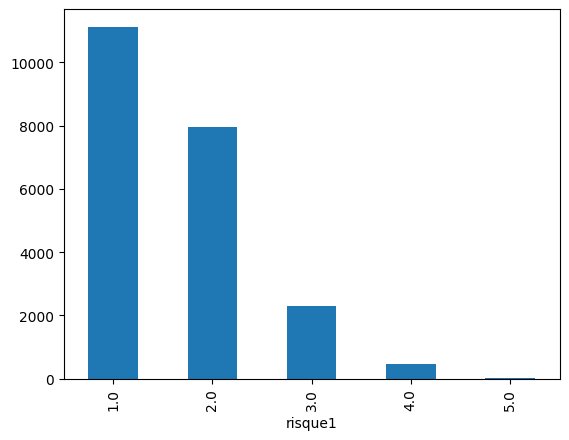

In [4]:
_ = y.value_counts().plot(kind='bar')

Check the number of Nan per column

In [19]:
data.isna().sum()

date                                        0
massif                                      0
evolurisque1                            18949
altitude                                12816
risque2                                     0
risque_maxi                                 0
00_temps                                    0
00_mer_de_nuages                            0
00_limite_pluie_neige                       0
00_isotherme_0                              0
00_isotherme_moins_10                       0
00_altitude_vent_1                          0
00_altitude_vent_2                          0
00_direction_vent_altitude_1                0
00_vitesse_vent_altitude_1                  0
00_direction_vent_altitude_2                0
00_vitesse_vent_altitude_2                  0
06_temps                                    0
06_mer_de_nuages                            0
06_limite_pluie_neige                       0
06_isotherme_0                              0
06_isotherme_moins_10             

Check the mean risk for each massif :

In [20]:
data.groupby('massif')['risque1'].mean()

massif
ANDORRE                 1.683417
ARAVIS                  1.687398
ASPE-OSSAU              1.700165
AURE-LOURON             1.685714
BAUGES                  1.654424
BEAUFORTAIN             1.758278
BELLEDONNE              1.790660
CAPCIR-PUYMORENS        1.736498
CERDAGNE-CANIGOU        1.570275
CHABLAIS                1.693980
CHAMPSAUR               1.536705
CHARTREUSE              1.640133
CINTO-ROTONDO           1.358429
COUSERANS               1.752053
DEVOLUY                 1.446488
EMBRUNAIS-PARPAILLON    1.482595
GRANDES-ROUSSES         1.777958
HAUT-VAR_HAUT-VERDON    1.393635
HAUTE-ARIEGE            1.781095
HAUTE-BIGORRE           1.742149
HAUTE-MAURIENNE         1.825083
HAUTE-TARENTAISE        1.782972
LUCHONNAIS              1.700000
MAURIENNE               1.749141
MERCANTOUR              1.415282
MONT-BLANC              1.721044
OISANS                  1.772727
ORLU__ST_BARTHELEMY     1.747049
PAYS-BASQUE             1.612903
PELVOUX                 1.567164
QUE

In [21]:
data.groupby('massif')['risque2'].mean()

massif
ANDORRE                 1.954774
ARAVIS                  2.130933
ASPE-OSSAU              2.039539
AURE-LOURON             2.026891
BAUGES                  1.751252
BEAUFORTAIN             2.211921
BELLEDONNE              2.243156
CAPCIR-PUYMORENS        1.970540
CERDAGNE-CANIGOU        1.684976
CHABLAIS                2.170569
CHAMPSAUR               2.226754
CHARTREUSE              1.734660
CINTO-ROTONDO           1.800327
COUSERANS               2.018062
DEVOLUY                 1.966555
EMBRUNAIS-PARPAILLON    2.014241
GRANDES-ROUSSES         2.280389
HAUT-VAR_HAUT-VERDON    1.896147
HAUTE-ARIEGE            2.033167
HAUTE-BIGORRE           2.071074
HAUTE-MAURIENNE         2.298680
HAUTE-TARENTAISE        2.270451
LUCHONNAIS              1.972131
MAURIENNE               2.194158
MERCANTOUR              1.840532
MONT-BLANC              2.383361
OISANS                  2.275974
ORLU__ST_BARTHELEMY     1.983137
PAYS-BASQUE             1.675806
PELVOUX                 2.271973
QUE

In [ ]:
data['date']=pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day_number'] = data['date'].dt.day

# Challenge evaluation

A particularly important point in a challenge is to describe how it is evaluated. This is the section where you should describe the metric that will be used to evaluate the participants' submissions, as well as your evaluation strategy, in particular if there is some complexity in the way the data should be split to ensure valid results.

# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

In [5]:
# %load submissions/starting_kit/estimator.py

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def get_estimator():
    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression()
    )

    return pipe


## Testing using a scikit-learn pipeline

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(get_estimator(), X_df, y, cv=5, scoring='accuracy')
print(scores)

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 652, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 586, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\preprocessing\_data.py", line 894, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\preprocessing\_data.py", line 930, in partial_fit
    X = validate_data(
        ^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\_array_api.py", line 832, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2019-01-23'

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 652, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 586, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\pipeline.py", line 1540, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\preprocessing\_data.py", line 894, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\preprocessing\_data.py", line 930, in partial_fit
    X = validate_data(
        ^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py", line 2944, in validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\sklearn\utils\_array_api.py", line 832, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\anaconda3\envs\datacamp\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: '2020-01-21'


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).